# **Import Libraries and modules**

### PLAN to improvise

1. Alter the number of parameters. and see whether the accuracy can be improved.
2. play with LR Scheduler and Dropout values


In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#importing all the necessary libraries 
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

#mnist is the data base (contains labled dataset)
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
#Loading the training and test sets to X_train, y_train and X_test and y_test
#Respectively from mnist data base
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


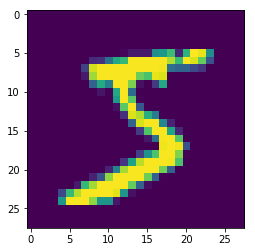

In [4]:
#Print the training data using matplot library,
#matplotlib inline is needed when we run using browser
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline

#See the share of first image
plt.imshow(X_train[0])

In [0]:
#Kears need (n, width, hight, depth) mnist have only (n, w, h) in mnist
#we know its a Grey scale so we keep depth as 1
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#convert our data type to float32 
#Normalize values to the range [0, 1].
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#Print 10 values of training dataset
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
#print the training data set after converting 1-D array to 10-D array
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [89]:
from keras.layers import Activation
#Declare the sequential keras model
model = Sequential()

#we are adding the first convolution layer with input of (w,h,d)
#32 = numer of convolutions(kernels), 3,3 is row col of kernels so its 3*3
#Activation = 'relu' this will be used to normalise the values between 0-1
#Receptive field of this layer = 3*3 input channel = 28*28*1
model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(12, 3, 3, activation='relu'))  #24
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(12, 3, 3, activation='relu'))  #22
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(16, 1, activation='relu'))     #22
model.add(MaxPooling2D(pool_size=(2, 2)))              #11

model.add(Convolution2D(12, 3, 3, activation='relu'))  #9
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(12, 3, 3, activation='relu'))  #7
model.add(BatchNormalization())
model.add(Dropout(0.07))

model.add(Convolution2D(12, 3, 3, activation='relu'))  #5
model.add(BatchNormalization())

model.add(Convolution2D(10, 5, 5))                     #1

#result should be converted back to 1-D array, to show as 0-9
model.add(Flatten())
model.add(Activation('softmax'))

#will give the summary of the model
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
batch_normalization_73 (Batc (None, 26, 26, 12)        48        
_________________________________________________________________
dropout_61 (Dropout)         (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 24, 24, 12)        1308      
_________________________________________________________________
batch_normalization_74 (Batc (None, 24, 24, 12)        48        
_________________________________________________________________
dropout_62 (Dropout)         (None, 24, 24, 12)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 22, 22, 12)        1308      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5))`


In [0]:
# this is to compile the model 
#NOTE: we can use different loss function and optimizer
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [97]:
#Here we diclared batch size of 256 so 10000/256 batches + declared 20 epoch
model.fit(X_train, Y_train, batch_size=512, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
 2560/60000 [>.............................] - ETA: 4s - loss: 0.0092 - acc: 0.9977

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 58us/step - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0397 - val_acc: 0.9873
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 3s 56us/step - loss: 0.0254 - acc: 0.9916 - val_loss: 0.0305 - val_acc: 0.9905
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 3s 56us/step - loss: 0.0195 - acc: 0.9938 - val_loss: 0.0327 - val_acc: 0.9905
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 3s 57us/step - loss: 0.0174 - acc: 0.9942 - val_loss: 0.0273 - val_acc: 0.9911
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==============================] - 3s 57us/step - loss: 0.0153 - acc: 0.9951 - val_loss: 0.0273 - val_acc: 0.9918
Epoch 6/40

Epoch 00006: L

In [0]:
#evaluate the model 
score = model.evaluate(X_test, Y_test, verbose=0)

In [99]:
#print the score
print(score)

[0.023545777017141153, 0.9933]


### **OBSERVATION** 
    we achieved 99.43 validation accuracy at 27th epoch with 10K parameters and 99.33 at end
        
     Reduced the channel size and increased the batch size to 512



In [0]:
#Predict the number present in X_test 
y_pred = model.predict(X_test)

In [95]:
#y_pred is predected value y_test is actual test value.
print(y_pred[:9])
print(y_test[:9])

[[4.82685500e-08 4.23589114e-07 3.00437159e-06 2.04477647e-06
  3.20007992e-10 1.84126669e-08 1.64445652e-10 9.99989986e-01
  4.46916903e-09 4.51881351e-06]
 [5.21268121e-05 1.68446510e-03 9.98077869e-01 2.32799157e-05
  3.52567724e-07 5.03113824e-07 1.60459618e-04 2.67942482e-07
  6.21842275e-07 1.25516442e-08]
 [1.78833588e-07 9.99960661e-01 1.65155484e-06 7.65717857e-07
  1.58281387e-06 2.75702320e-07 2.78101038e-06 3.17450140e-05
  9.74665895e-08 2.12441236e-07]
 [9.99739230e-01 6.64928962e-07 8.14352916e-06 1.63132427e-07
  4.14892384e-06 1.46665525e-06 2.17730936e-04 1.03197053e-07
  1.27212604e-06 2.69216289e-05]
 [4.55982914e-08 3.13392945e-07 2.77995582e-08 1.61239488e-09
  9.99871373e-01 6.15087814e-10 5.74582231e-08 1.11381745e-07
  4.50187763e-08 1.28133790e-04]
 [1.09694746e-07 9.99689102e-01 2.00715408e-06 4.50094319e-07
  4.37806602e-06 1.01977975e-07 8.11776033e-07 3.02270841e-04
  2.94100744e-08 6.38997790e-07]
 [2.02565256e-10 1.72292166e-05 3.72485331e-08 3.22092930e